In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Các thư viện cần thiết**

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

**Load MNIST dataset**

In [41]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

(50000, 28, 28)


**Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu**

In [42]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape)

(50000, 28, 28, 1)


**One hot encoding label (Y)**

In [43]:
Y_train = np_utils.to_categorical(y_train, num_classes=10)
Y_val = np_utils.to_categorical(y_val, num_classes=10)
Y_test = np_utils.to_categorical(y_test, num_classes=10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**Định nghĩa model**

In [44]:
model = Sequential()

In [45]:
# Thêm Convolutional layer với 32 filter, kích thước filter 3*3
# Dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

In [46]:
# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

In [47]:
# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [48]:
# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

In [49]:
# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

In [50]:
# Output layer với 10 node và dùng softmax function để chuyển sang xác suất.
model.add(Dense(10, activation='softmax'))

**Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức dùng để tối ưu hàm loss function**

In [51]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

**Thực hiện train model với data**

In [52]:
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
              batch_size=32, epochs=10, verbose=2)

Epoch 1/10
1563/1563 - 7s - loss: 0.3103 - accuracy: 0.9118 - val_loss: 0.0711 - val_accuracy: 0.9805
Epoch 2/10
1563/1563 - 7s - loss: 0.0583 - accuracy: 0.9832 - val_loss: 0.0516 - val_accuracy: 0.9856
Epoch 3/10
1563/1563 - 7s - loss: 0.0365 - accuracy: 0.9894 - val_loss: 0.0437 - val_accuracy: 0.9875
Epoch 4/10
1563/1563 - 7s - loss: 0.0235 - accuracy: 0.9935 - val_loss: 0.0453 - val_accuracy: 0.9863
Epoch 5/10
1563/1563 - 7s - loss: 0.0155 - accuracy: 0.9958 - val_loss: 0.0404 - val_accuracy: 0.9881
Epoch 6/10
1563/1563 - 6s - loss: 0.0104 - accuracy: 0.9976 - val_loss: 0.0407 - val_accuracy: 0.9889
Epoch 7/10
1563/1563 - 7s - loss: 0.0071 - accuracy: 0.9982 - val_loss: 0.0409 - val_accuracy: 0.9883
Epoch 8/10
1563/1563 - 6s - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.0409 - val_accuracy: 0.9881
Epoch 9/10
1563/1563 - 7s - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0465 - val_accuracy: 0.9876
Epoch 10/10
1563/1563 - 7s - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0437 - 

**Vẽ đồ thị loss, accuracy của training set và validation set**

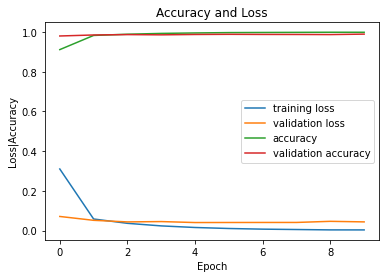

In [53]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

**Đánh giá model với dữ liệu test set**

In [54]:
score = model.evaluate(X_test, Y_test, verbose=2)
print(score)

313/313 - 1s - loss: 0.0331 - accuracy: 0.9906
[0.03312807157635689, 0.9905999898910522]


**Dự đoán ảnh**

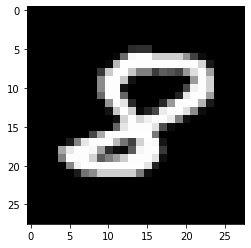

In [57]:
plt.imshow(X_test[61].reshape(28,28), cmap='gray')

In [58]:
y_predict = model.predict(X_test[61].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))  # Để tìm CHỈ SỐ mà tại đó mảng 1 chiều đạt giá trị lớn nhất, ta dùng np.argmax

Giá trị dự đoán:  8
